# World values analysis

## 1. Define question <br>

This project focuses on understanding the differences between attitudes to work around the world, and what drives those differences. Specifically:  <br> <br>
a) How do attitudes towards work differ around the globe? <br>
b) Are attitudes to work correlated to GDP and development efforts? <br>
c) If so, does increasing GDP lead or lag changing attitudes to work?

## 2. Get data

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
data = pd.read_csv('./world-values-survey-data/WVS_per_Country.csv', index_col = "Country")
data_dict = pd.read_csv('./world-values-survey-data/Code_book.csv', index_col="Variable")

In [284]:
data.index.value_counts().head(5)

South Africa    6
Japan           6
Argentina       6
South Korea     6
Mexico          6
Name: Country, dtype: int64

In [285]:
data.T.shape

(1890, 234)

In [286]:
data.T.head(5)

Country,Albania,Albania,Algeria,Algeria,Andorra,Azerbaijan,Azerbaijan,Argentina,Argentina,Argentina,...,Uruguay,Uruguay,Uruguay,Uzbekistan,Venezuela,Venezuela,Yemen,Serbia and Montenegro,Zambia,Bosnian Federation
Wave,4,3,4,6,5,6,3,4,2,5,...,3,5,6,6,4,3,6,5,5,3
S004,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
S006,500.5,200500,641.501,600.5,722.209,501.5,191002,687.016,501.5,507.224,...,750.5,501.906,530.712,750.5,603.417,600.5,500.5,611.252,804.745,260691
S007,112494,78594,113636,331700,171526,272930,82094.5,114916,10808.5,172528,...,74852.5,222472,269428,278748,168422,77494.5,328194,211990,225764,85587.5
S007_01,8.04805e+07,8.03605e+07,1.20481e+08,1.20601e+08,2.00601e+08,3.10601e+08,3.10361e+08,3.20481e+08,3.20241e+08,3.20601e+08,...,8.58036e+09,8.5806e+09,8.5806e+09,8.6006e+09,8.62048e+09,8.62036e+09,8.8706e+09,8.9106e+09,8.9406e+09,9.14036e+09


In [287]:
data_dict.head()

,IDX,Label,Type,Length,Categories,Theme
Variable,,,,,,
A001,001_001,Important in life: Family,NaN,2,1:Very important\n2:Rather important\n3:Not ve...,Perceptions of life
A001_CO,001_001_001,Family important,NaN,2,1:Very important\n2:Important\n3:Not at all im...,Perceptions of life
A002,001_002,Important in life: Friends,NaN,2,1:Very important\n2:Rather important\n3:Not ve...,Perceptions of life
A002_CO,001_002_001,Friends important,NaN,2,1:Very important\n2:Important\n3:Not at all im...,Perceptions of life
A003,001_003,Important in life: Leisure time,NaN,2,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Perceptions of life


In [288]:
data_dict.shape

(1420, 6)

In [289]:
full_df = pd.merge(data_dict, data.T,  how = 'right', left_index=True, right_index=True)
full_df.head(100)

,IDX,Label,Type,Length,Categories,Theme,Albania,Albania,Algeria,Algeria,...,Uruguay,Uruguay,Uruguay,Uzbekistan,Venezuela,Venezuela,Yemen,Serbia and Montenegro,Zambia,Bosnian Federation
Wave,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,6,...,3,5,6,6,4,3,6,5,5,3
S004,010_006,Set,NaN,5.0,1:1\n2:2\n-5:Missing; Unknown\n-4:Not asked in...,Structure of the file,NaN,1,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
S006,010_007,Original respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,500.5,200500,641.501,600.5,...,750.5,501.906,530.712,750.5,603.417,600.5,500.5,611.252,804.745,260691
S007,010_008,Unified respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,112494,78594,113636,331700,...,74852.5,222472,269428,278748,168422,77494.5,328194,211990,225764,85587.5
S007_01,NaN,NaN,NaN,NaN,NaN,NaN,8.04805e+07,8.03605e+07,1.20481e+08,1.20601e+08,...,8.58036e+09,8.5806e+09,8.5806e+09,8.6006e+09,8.62048e+09,8.62036e+09,8.8706e+09,8.9106e+09,8.9406e+09,9.14036e+09
S009,NaN,NaN,NaN,NaN,NaN,NaN,AL,AL,DZ,DZ,...,UY,UY,UY,UZ,VE,VE,YE,CS,ZM,BOS
S009A,NaN,NaN,NaN,NaN,NaN,NaN,AL,AL,DZ,DZ,...,UY,UY,UY,UZ,VE,VE,YE,CS,ZM,BOS
S010,010_010,Total length of interview,NaN,8.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,80.278,96.5966,62.0273,NaN,...,40.635,NaN,NaN,NaN,49.885,56.8817,NaN,NaN,NaN,117.375
S011,010_011,Time at the end of interview,NaN,8.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,1411.44,NaN,NaN,NaN,...,14.897,NaN,NaN,NaN,1500.79,NaN,NaN,NaN,NaN,NaN
S012,010_012,Date interview,NaN,8.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,NaN,NaN,NaN,NaN,...,NaN,NaN,2.01111e+07,NaN,NaN,NaN,2.01402e+07,NaN,NaN,NaN


In [290]:
theme_counts = pd.DataFrame(full_df["Theme"].value_counts())
theme_counts.drop("Structure of the file", inplace=True)
theme_counts

,Theme
Politics and Society,263
Perceptions of life,210
Religion and Morale,122
National Identity,105
Family,64
Work,46
Socio-demographics,39
Environment,23
Security,22
Special Indexes,3


/Users/superviv/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


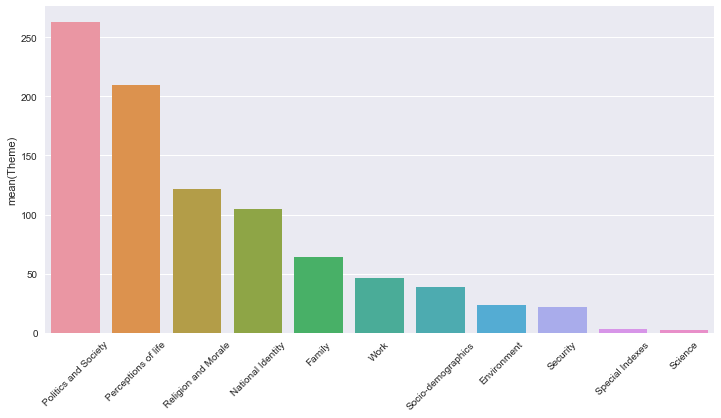

In [291]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax = sns.barplot(theme_counts.index, theme_counts["Theme"], data = theme_counts)
plt.setp(ax.get_xticklabels(), rotation=45);

In [292]:
def topics(theme):
    return full_df.query(f"Theme == '{theme}'")['Label'].unique()

In [293]:
topics('Work')

array(['Jobs scarce: Men should have more right to a job than women',
       'Jobs scarce: Employers should give priority to (nation) people than immigrants',
       'Jobs scarce: older people should be forced to retire',
       'Unfair to give work to handicapped people when able bodied people can´t find jobs',
       'Satisfaction with financial situation of household',
       'Work compared with Leisure', 'First choice, if looking for a job',
       'Second choice if looking for a job',
       'Important in a job: good pay',
       'Important in a job: not too much pressure',
       'Important in a job: good job security',
       'Important in a job: a respected job',
       'Important in a job: good hours',
       'Important in a job: an opportunity to use initiative',
       'Important in a job: generous holidays',
       'Important in a job: that you can achieve something',
       'Important in a job: a responsible job',
       'Important in a job: a job that is interesting',
   

 ### Focusing in on questions related to jobs

In [294]:
work_questions = topics('Work').tolist()

In [295]:
full_df.head()

,IDX,Label,Type,Length,Categories,Theme,Albania,Albania,Algeria,Algeria,...,Uruguay,Uruguay,Uruguay,Uzbekistan,Venezuela,Venezuela,Yemen,Serbia and Montenegro,Zambia,Bosnian Federation
Wave,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,6,...,3,5,6,6,4,3,6,5,5,3
S004,010_006,Set,NaN,5.0,1:1\n2:2\n-5:Missing; Unknown\n-4:Not asked in...,Structure of the file,NaN,1,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
S006,010_007,Original respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,500.5,200500,641.501,600.5,...,750.5,501.906,530.712,750.5,603.417,600.5,500.5,611.252,804.745,260691
S007,010_008,Unified respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,112494,78594,113636,331700,...,74852.5,222472,269428,278748,168422,77494.5,328194,211990,225764,85587.5
S007_01,NaN,NaN,NaN,NaN,NaN,NaN,8.04805e+07,8.03605e+07,1.20481e+08,1.20601e+08,...,8.58036e+09,8.5806e+09,8.5806e+09,8.6006e+09,8.62048e+09,8.62036e+09,8.8706e+09,8.9106e+09,8.9406e+09,9.14036e+09


In [296]:
sandbox_df = full_df
sandbox_df.loc['Wave', 'Label'] = 'Wave'
sandbox_df.head()

,IDX,Label,Type,Length,Categories,Theme,Albania,Albania,Algeria,Algeria,...,Uruguay,Uruguay,Uruguay,Uzbekistan,Venezuela,Venezuela,Yemen,Serbia and Montenegro,Zambia,Bosnian Federation
Wave,NaN,Wave,NaN,NaN,NaN,NaN,4,3,4,6,...,3,5,6,6,4,3,6,5,5,3
S004,010_006,Set,NaN,5.0,1:1\n2:2\n-5:Missing; Unknown\n-4:Not asked in...,Structure of the file,NaN,1,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
S006,010_007,Original respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,500.5,200500,641.501,600.5,...,750.5,501.906,530.712,750.5,603.417,600.5,500.5,611.252,804.745,260691
S007,010_008,Unified respondent number,NaN,10.0,-5:Missing; Unknown\n-4:Not asked in survey\n-...,Structure of the file,112494,78594,113636,331700,...,74852.5,222472,269428,278748,168422,77494.5,328194,211990,225764,85587.5
S007_01,NaN,NaN,NaN,NaN,NaN,NaN,8.04805e+07,8.03605e+07,1.20481e+08,1.20601e+08,...,8.58036e+09,8.5806e+09,8.5806e+09,8.6006e+09,8.62048e+09,8.62036e+09,8.8706e+09,8.9106e+09,8.9406e+09,9.14036e+09


In [297]:
# create a new df that will be a subset of the original dataframe
work_df = full_df
work_df.index = work_df['Label']
work_df = work_df.T

# select the columns that relate to the "Work" theme (and the "Wave" column to track timing)
work_df.loc['Label']['Wave'] = 'Wave'
work_questions.append('Wave')
work_df = work_df[work_questions]
# split df into header rows and data rows

work_df_header = work_df.iloc[0:6][:]
work_df_data = work_df.iloc[6:][:]

In [298]:
work_df_header

Label,Jobs scarce: Men should have more right to a job than women,Jobs scarce: Employers should give priority to (nation) people than immigrants,Jobs scarce: older people should be forced to retire,Unfair to give work to handicapped people when able bodied people can´t find jobs,Satisfaction with financial situation of household,Work compared with Leisure,"First choice, if looking for a job",Second choice if looking for a job,Important in a job: good pay,Important in a job: not too much pressure,...,Why people work: work most important in my life,Why people work: I never had a paid job,Why people work: don’t know,Fairness: One secretary is paid more,How business and industry should be managed,Following instructions at work,Work: until satisfied with results,Work: accomplish personal goals,Work: stay up late to finish,Wave
IDX,003_001,003_002,003_004,003_005,003_006,003_008,003_009,003_010,003_011,003_012,...,003_046,003_047,003_048,003_059,003_060,003_061,003_062,003_063,003_064,NaN
Label,Jobs scarce: Men should have more right to a j...,Jobs scarce: Employers should give priority to...,Jobs scarce: older people should be forced to ...,Unfair to give work to handicapped people when...,Satisfaction with financial situation of house...,Work compared with Leisure,"First choice, if looking for a job",Second choice if looking for a job,Important in a job: good pay,Important in a job: not too much pressure,...,Why people work: work most important in my life,Why people work: I never had a paid job,Why people work: don’t know,Fairness: One secretary is paid more,How business and industry should be managed,Following instructions at work,Work: until satisfied with results,Work: accomplish personal goals,Work: stay up late to finish,Wave
Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,NaN
Categories,1:Agree\n2:Disagree\n3:Neither\n-5:Missing; Un...,1:Agree\n2:Disagree\n3:Neither\n-5:Missing; Un...,1:Agree\n2:Disagree\n3:Neither\n-5:Missing; Un...,1:Agree\n2:Disagree\n3:Neither\n-5:Missing; Un...,1:Dissatisfied\n2:2\n3:3\n4:4\n5:5\n6:6\n7:7\n...,"1:It´s leisure that makes life worth living, n...",1:A good income\n2:A safe job with no risk\n3:...,1:A good income\n2:A safe job with no risk\n3:...,0:Not mentioned\n1:Mentioned\n-5:Missing; Unkn...,0:Not mentioned\n1:Mentioned\n-5:Missing; Unkn...,...,0:not mentioned\n1:mentioned\n-5:Missing; Unkn...,0:not mentioned\n1:mentioned\n-5:Missing; Unkn...,0:not mentioned\n1:mentioned\n-5:Missing; Unkn...,0:Not fair\n1:Fair\n-5:Missing; Unknown\n-4:No...,1:Owners should run their business\n2:Owners/E...,1:Follow instructions\n2:Must be convinced fir...,1:Strongly agree\n2:Agree\n3:Disagree\n4:Stron...,1:Strongly agree\n2:Agree\n3:Disagree\n4:Stron...,1:Strongly agree\n2:Agree\n3:Disagree\n4:Stron...,NaN
Theme,Work,Work,Work,Work,Work,Work,Work,Work,Work,Work,...,Work,Work,Work,Work,Work,Work,Work,Work,Work,NaN


In [299]:
work_df_data.head()

Label,Jobs scarce: Men should have more right to a job than women,Jobs scarce: Employers should give priority to (nation) people than immigrants,Jobs scarce: older people should be forced to retire,Unfair to give work to handicapped people when able bodied people can´t find jobs,Satisfaction with financial situation of household,Work compared with Leisure,"First choice, if looking for a job",Second choice if looking for a job,Important in a job: good pay,Important in a job: not too much pressure,...,Why people work: work most important in my life,Why people work: I never had a paid job,Why people work: don’t know,Fairness: One secretary is paid more,How business and industry should be managed,Following instructions at work,Work: until satisfied with results,Work: accomplish personal goals,Work: stay up late to finish,Wave
Albania,1.75076,1.32597,NaN,NaN,4.75752,4.29749,1.92548,2.3011,0.952,0.455,...,NaN,NaN,NaN,0.826419,1.80338,2.18977,NaN,NaN,NaN,4
Albania,1.57844,1.01943,1.16684,NaN,4.62602,4.59524,1.5996,2.48091,0.994995,0.372372,...,NaN,NaN,NaN,0.927212,1.78556,2.05323,1.46939,1.61343,1.86588,3
Algeria,1.45159,1.21389,NaN,NaN,5.92223,4.56735,NaN,NaN,0.897816,0.595164,...,NaN,NaN,NaN,0.817957,2.15706,1.8542,NaN,NaN,NaN,4
Algeria,1.60034,NaN,NaN,NaN,5.98813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
Andorra,2.01199,1.868,NaN,NaN,6.28514,NaN,2.8833,2.29878,NaN,NaN,...,NaN,NaN,NaN,0.81407,NaN,NaN,NaN,NaN,NaN,5


In [300]:
# create a dataframe mapping waves to years (source: http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp)

wave_years = pd.DataFrame([{'Wave' : 1, 'start_year': 1981, 'end_year' : 1984},
                           {'Wave' : 2, 'start_year': 1990, 'end_year' : 1944},
                           {'Wave' : 3, 'start_year': 1995, 'end_year' : 1998},
                           {'Wave' : 4, 'start_year': 1999, 'end_year' : 2004},
                           {'Wave' : 5, 'start_year': 2005, 'end_year' : 2009},
                           {'Wave' : 6, 'start_year': 2010, 'end_year' : 2014},
                           {'Wave' : 7, 'start_year': 2015, 'end_year' : 2018}
                          ])
wave_years

,Wave,end_year,start_year
0,1,1984,1981
1,2,1944,1990
2,3,1998,1995
3,4,2004,1999
4,5,2009,2005
5,6,2014,2010
6,7,2018,2015


In [301]:
# merge in years

work_df_index = work_df_data.index
work_df_data = pd.merge(left = work_df_data, right = wave_years, how = 'left', on = 'Wave')
work_df_data.index = work_df_index
work_df_data.head()

,Jobs scarce: Men should have more right to a job than women,Jobs scarce: Employers should give priority to (nation) people than immigrants,Jobs scarce: older people should be forced to retire,Unfair to give work to handicapped people when able bodied people can´t find jobs,Satisfaction with financial situation of household,Work compared with Leisure,"First choice, if looking for a job",Second choice if looking for a job,Important in a job: good pay,Important in a job: not too much pressure,...,Why people work: don’t know,Fairness: One secretary is paid more,How business and industry should be managed,Following instructions at work,Work: until satisfied with results,Work: accomplish personal goals,Work: stay up late to finish,Wave,end_year,start_year
Albania,1.75076,1.32597,NaN,NaN,4.75752,4.29749,1.92548,2.3011,0.952,0.455,...,NaN,0.826419,1.80338,2.18977,NaN,NaN,NaN,4,2004,1999
Albania,1.57844,1.01943,1.16684,NaN,4.62602,4.59524,1.5996,2.48091,0.994995,0.372372,...,NaN,0.927212,1.78556,2.05323,1.46939,1.61343,1.86588,3,1998,1995
Algeria,1.45159,1.21389,NaN,NaN,5.92223,4.56735,NaN,NaN,0.897816,0.595164,...,NaN,0.817957,2.15706,1.8542,NaN,NaN,NaN,4,2004,1999
Algeria,1.60034,NaN,NaN,NaN,5.98813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2014,2010
Andorra,2.01199,1.868,NaN,NaN,6.28514,NaN,2.8833,2.29878,NaN,NaN,...,NaN,0.81407,NaN,NaN,NaN,NaN,NaN,5,2009,2005


# 3. EDA

In [302]:
work_df_info = work_df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, Albania to Bosnian Federation
Data columns (total 49 columns):
Jobs scarce: Men should have more right to a job than women                          223 non-null object
Jobs scarce: Employers should give priority to (nation) people than immigrants       213 non-null object
Jobs scarce: older people should be forced to retire                                 68 non-null object
Unfair to give work to handicapped people when able bodied people can´t find jobs    15 non-null object
Satisfaction with financial situation of household                                   231 non-null object
Work compared with Leisure                                                           85 non-null object
First choice, if looking for a job                                                   132 non-null object
Second choice if looking for a job                                                   130 non-null object
Important in a job: good pay              

#### Note that there are lots of null values in this dataset. However, some of the job attributes ("Important in a job") columns have more data than most. Narrowing in on these columns could reduce null values

In [320]:
job_attributes_list = ['Important in a job: not too much pressure',
       'Important in a job: good job security',
       'Important in a job: a respected job', 'Important in a job: good hours',
       'Important in a job: an opportunity to use initiative',
       'Important in a job: generous holidays',
       'Important in a job: that you can achieve something',
       'Important in a job: a responsible job',
       'Important in a job: a job that is interesting',
       'Important in a job: a job that meets one´s abilities']
job_attributes_and_wave_info = ['Important in a job: not too much pressure',
       'Important in a job: good job security',
       'Important in a job: a respected job', 'Important in a job: good hours',
       'Important in a job: an opportunity to use initiative',
       'Important in a job: generous holidays',
       'Important in a job: that you can achieve something',
       'Important in a job: a responsible job',
       'Important in a job: a job that is interesting',
       'Important in a job: a job that meets one´s abilities',
       'Wave', 'start_year', 'end_year']

In [304]:
job_attributes_df = work_df_data[job_attributes_and_wave_info].dropna()
print(f'The job attributes dataframe has {job_attributes_df.shape[0]} rows of data \
covering {job_attributes_df.shape[1]} different attributes, with {job_attributes_df.isnull().sum().sum()} nulls')

The job attributes dataframe has 101 rows of data covering 13 different attributes, with 0 nulls


In [305]:
job_attributes_df.head()

,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,Wave,start_year,end_year
Albania,0.455,0.812,0.645,0.55,0.397,0.483,0.513,0.254,0.411,0.294,4,1999,2004
Albania,0.372372,0.853854,0.417417,0.610611,0.426426,0.533534,0.521522,0.173173,0.458458,0.888889,3,1995,1998
Algeria,0.595164,0.863495,0.719969,0.5117,0.435257,0.205148,0.602964,0.464119,0.565523,0.701248,4,1999,2004
Azerbaijan,0.557443,0.742757,0.648851,0.546953,0.351648,0.383616,0.49001,0.446553,0.812687,0.734266,3,1995,1998
Argentina,0.327344,0.694531,0.316406,0.423438,0.403906,0.20625,0.475,0.401562,0.395313,0.503125,4,1999,2004


These questions span waves 1-4 of the survey, as can be seen by running the code below

In [306]:
# job_attributes_df['Wave'].value_counts()

They cover a range of countries, with the highest number of data points from Mexico, Argentina and Japan (4 each) and Spain, China, Turkey, Chile and India (3 each), as can be seen from running the code below 

In [307]:
# job_attributes_df.index.value_counts()

#### We can visualize the change in values over time using scatter plots

First, sort data by wave (year). Then create sub-dataframes and plot

In [308]:
job_attributes_df.sort_values('Wave', inplace=True)
job_attributes_df.head()

,Important in a job: not too much pressure,Important in a job: good job security,Important in a job: a respected job,Important in a job: good hours,Important in a job: an opportunity to use initiative,Important in a job: generous holidays,Important in a job: that you can achieve something,Important in a job: a responsible job,Important in a job: a job that is interesting,Important in a job: a job that meets one´s abilities,Wave,start_year,end_year
South Africa,0.351504,0.595238,0.352757,0.516917,0.450501,0.323935,0.56391,0.450501,0.599624,0.442982,1,1981,1984
Hungary,0.311475,0.693989,0.489754,0.678279,0.419399,0.418716,0.663934,0.620219,0.613388,0.755464,1,1981,1984
Japan,0.388704,0.482558,0.211794,0.449336,0.254153,0.364618,0.361296,0.431063,0.295681,0.683555,1,1981,1984
Argentina,0.366169,0.528358,0.264677,0.560199,0.468657,0.371144,0.338308,0.331343,0.383085,0.352239,1,1981,1984
Finland,0.00299103,0.0259222,0.000997009,0.000997009,0.0139581,0.0179462,0.0219342,0.00997009,0.127617,0.0319043,1,1981,1984


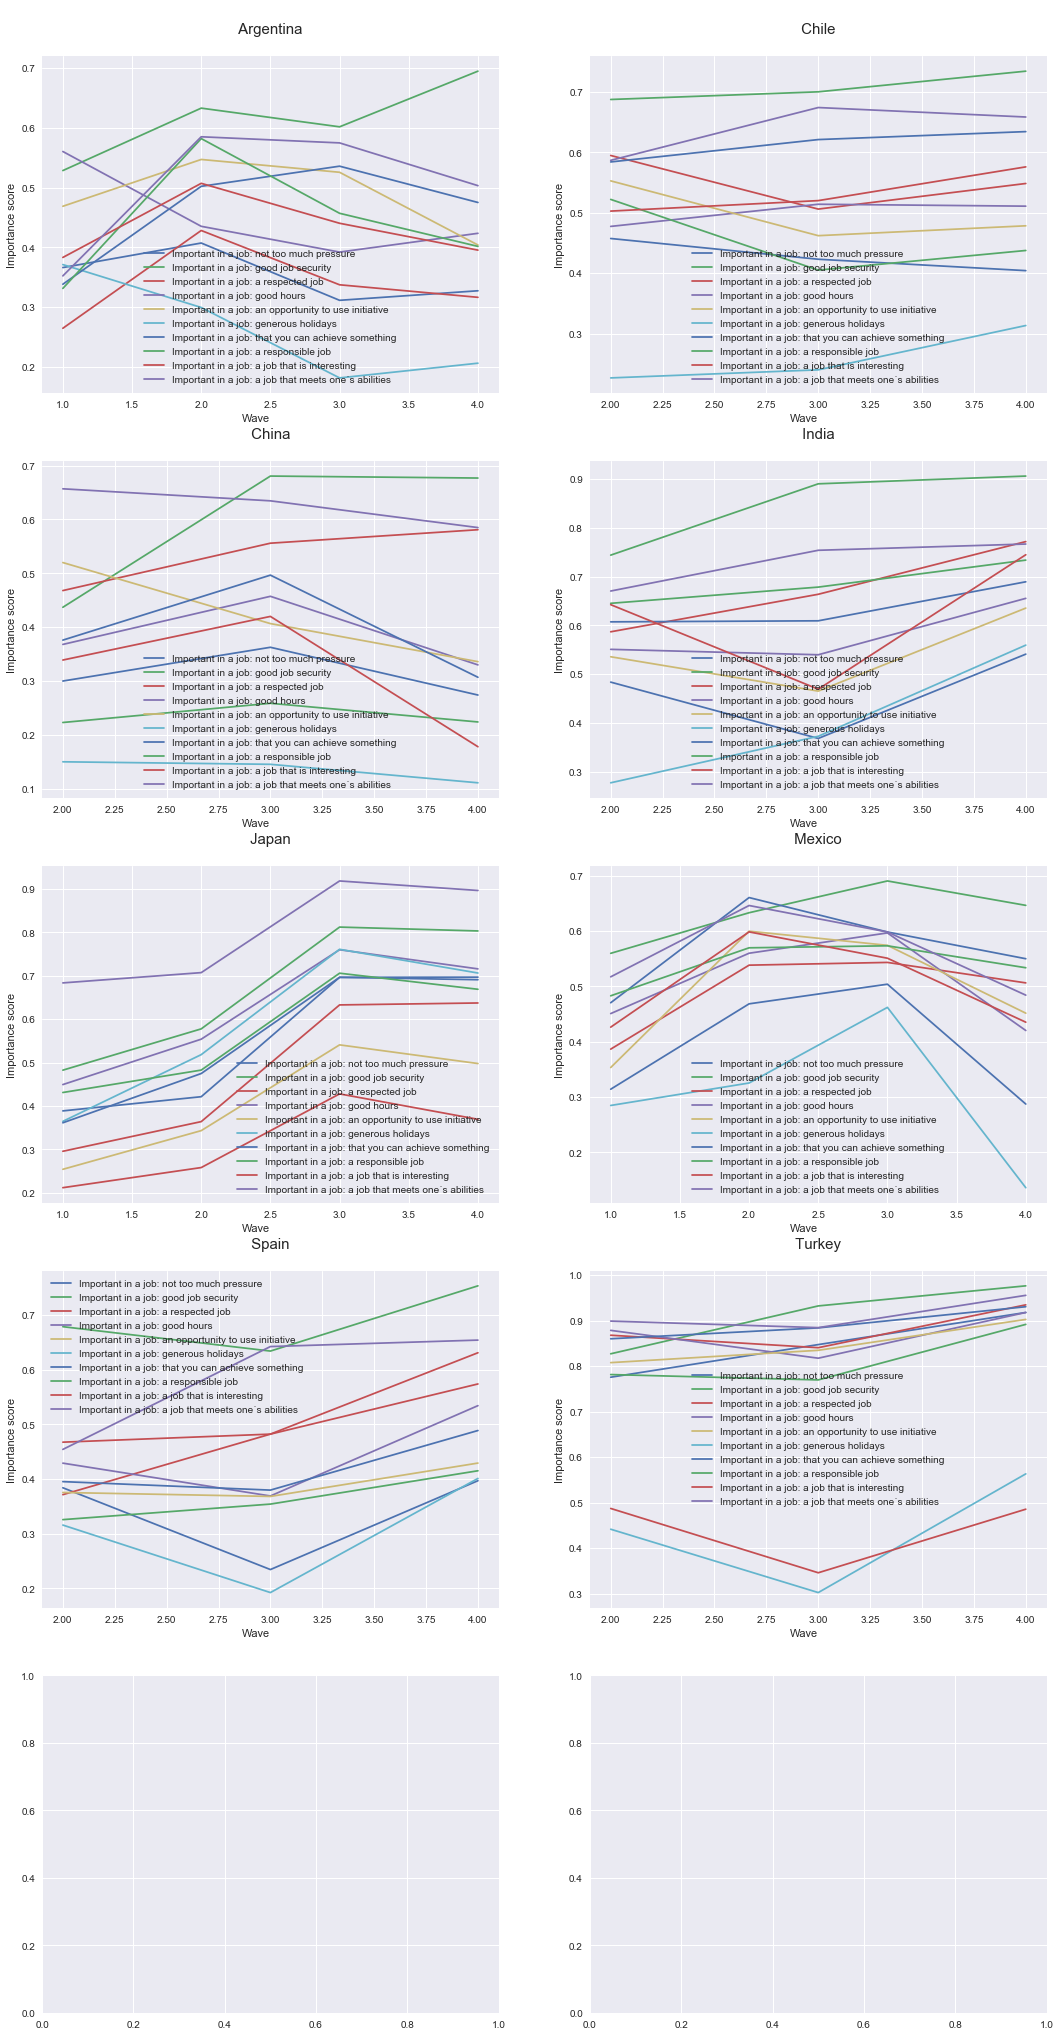

In [382]:
top_countries = ['Mexico', 'Argentina', 'Japan', 'Spain', 'China', 'Turkey', 'Chile', 'India']

n_cols = 2
n_rows = int(len(top_countries)//n_cols)+1
figure, ax = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(18,36))
i = 0 # this is a counter to tell matplotlib which axis to plot on

for index, dataframe in job_attributes_df.groupby(job_attributes_df.index):
    if index in top_countries:
        ax[i//n_cols][i%n_cols].set_title(f"\n {index} \n", fontsize = 15)
        ax[i//n_cols][i%n_cols].plot(dataframe['Wave'], dataframe[job_attributes_list])
        ax[i//n_cols][i%n_cols].legend(job_attributes_list)
        ax[i//n_cols][i%n_cols].set_xlabel('Wave', horizontalalignment = 'right')
        ax[i//n_cols][i%n_cols].set_ylabel('Importance score')
        i +=1

#### Interpretation of charts

.. For some countries (e.g., Japan) the scores trend up and down together. Since the score 

In [366]:
# work_df_header.loc['Categories','Important in a job: not too much pressure']

'0:Not mentioned\n1:Mentioned\n-5:Missing; Unknown\n-4:Not asked in survey\n-3:Not applicable\n-2:No answer\n-1:Don´t know\n'

In [ ]:
# plot evolution of values over time, per country

 ### Interesting questions
 
 - 'The culture of US and other Western countries has many positive attributes'
 - 'Exposure to the culture of the US and other Western countries harmful effect on our country'
 -  'How proud of nationality' \[National Identity\]
 - Important in life - family friends etc.
 - Justifiable \[Religion and Morale\]
 - All family items
 - All work items
 - All security items
 - Special indexes - post materialist, autonomy, etc
 - Sociodemographics topic includes type of work (creative v. routine) - could link to shift in values as move from primary to secondary / tertiary industry
 
 --> Important in a job, why people work, important in a child

In [ ]:
# To do:

# Make job_attributes_and_wave_info list build on job_attributes_list --> using extend?
# Clean up legends on country plots (placement, 'important in a job')